In [33]:
print("hello")

hello


In [3]:
import duckdb
import plotly.express as px

In [4]:
players = duckdb.query("""
    select * from 'raw_data/*_players.parquet'
""")

In [5]:
matches = duckdb.query("""
    select * from 'raw_data/*_matches.parquet'
""")

In [6]:
joined_table = duckdb.query("""
    select * 
    from players
    join matches
    on players.game_id = matches.game_id
""")


In [52]:
elo_diff = duckdb.query("""
    select 
        irl_duration/60000000000 as irl_duration_min,
        round_even(abs(team_1_elo - team_0_elo)/10, 0) as elo_diff_base_10
    from joined_table
    where team_1_elo > 2000
    and team_0_elo > 2000
    and irl_duration_min < 60
    and elo_diff_base_10 < 10
""")


In [54]:
duckdb.sql("select count (*) from elo_diff").show()

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│       328658 │
└──────────────┘



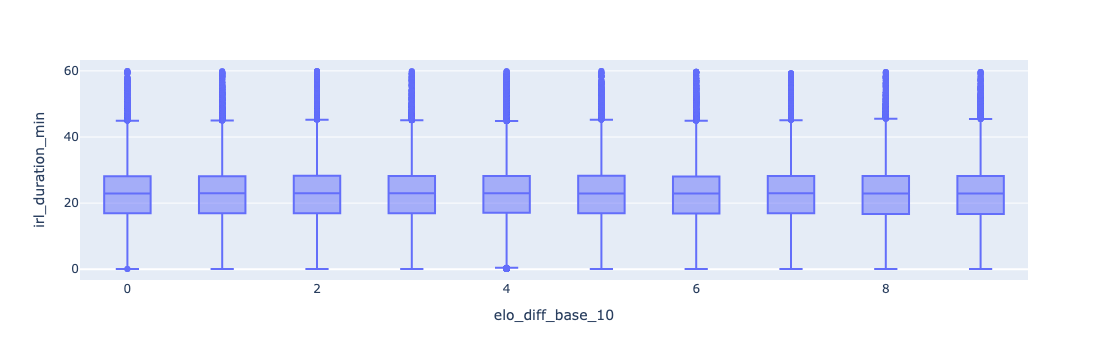

In [56]:
px.box(elo_diff, x="elo_diff_base_10", y="irl_duration_min", title='').show()

In [ ]:
duration_counts

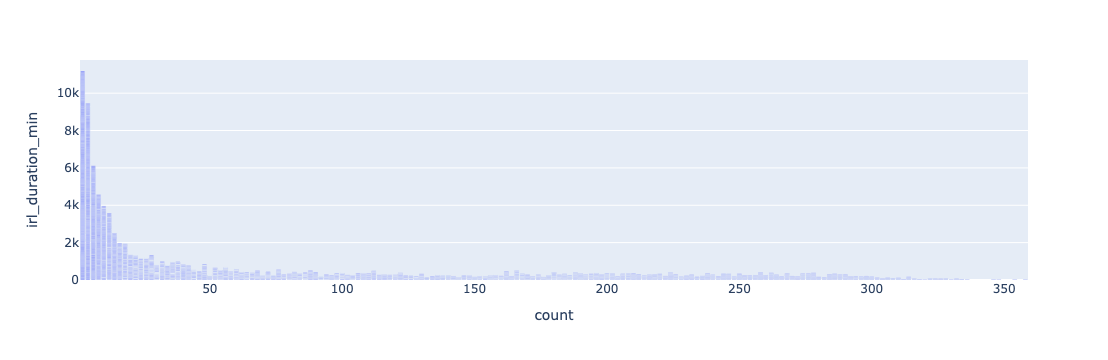

In [48]:
px.bar(
    duckdb.sql("select count(*) as count, irl_duration_min from elo_diff group by irl_duration_min"), 
    x="count", 
    y="irl_duration_min").show()